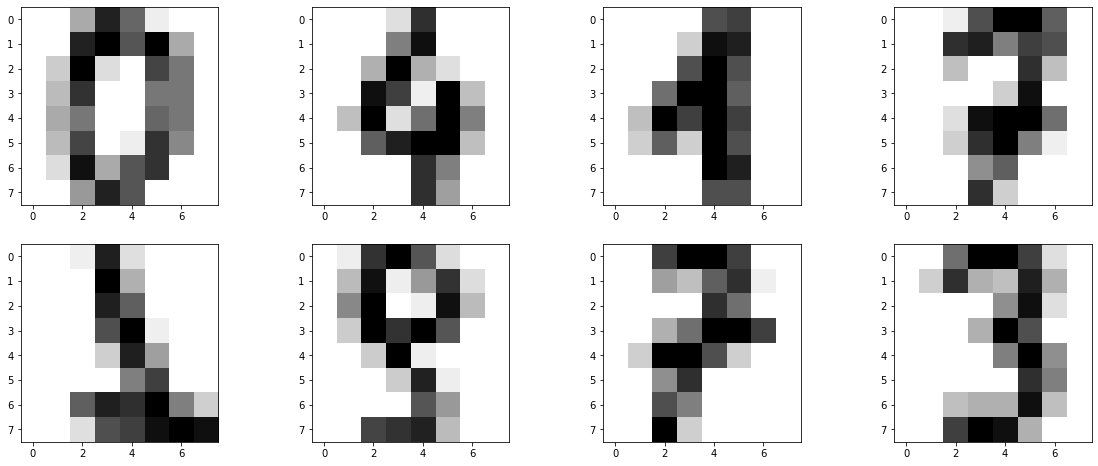

In [31]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data , target = load_digits(return_X_y=True)
data = pd.DataFrame(data)
target = pd.Series(target)
#plot no. 0, 100, 200, 300 row's data.
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
plt_num = 0
for i in rows:
    image = data.iloc[i] 
    np_image = image.values
    np_image = np_image.reshape(8,8)
    plt_num += 1
    ax = plt.subplot(2,4,plt_num)
    ax.imshow(np_image, cmap='gray_r')

#Use KNN model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [33]:
def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn
def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    accuracy = sum(predictions==test_target)/len(test_target)
    return accuracy
def cross_validate(k,df,target):
    kf = KFold(n_splits=4,random_state=2)
    train_accuracies = []
    test_accuracies = []
    for train_index ,test_index in kf.split(df):
        train_features,test_features = df.loc[train_index],df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        knc = train(k, train_features, train_target)
        train_accuracy = test(knc, train_features, train_target)
        test_accuracy = test(knc, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [34]:
train_accuracies, test_accuracies = cross_validate(1, data, target)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print('mean_train_accuracies = ', mean_train_accuracies)
print('mean_test_accuracies = ', mean_test_accuracies)

mean_train_accuracies =  1.0
mean_test_accuracies =  0.9677233358079684


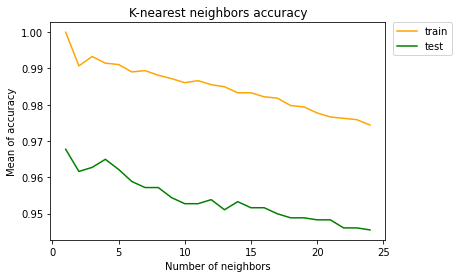

In [35]:
import warnings
warnings.filterwarnings("ignore")
#use the plot to see how many neighbors have the best performance
train_mean_accuracies = []
test_mean_accuracies = []
for k in range(1, 25):
    train_accuracies, test_accuracies = cross_validate(k, data, target)
    train_mean_accuracies.append(np.mean(train_accuracies))
    test_mean_accuracies.append(np.mean(test_accuracies))
x = range(1, 25)
y = train_mean_accuracies
plt.plot(x, y, color = 'orange', label = 'train')
y = test_mean_accuracies
plt.plot(x, y, color = 'green', label = 'test')

plt.xlabel('Number of neighbors')
plt.ylabel('Mean of accuracy')
plt.title('K-nearest neighbors accuracy')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)

There are a few downsides to using k-nearest neighbors:


1.   high memory usage (for each new unseen observation, many comparisons need to be made to seen observations) 
2.   no model representation to debug and explore

 


#Neural Network with a single hidden layer

In [36]:
from sklearn.neural_network import MLPClassifier
def train_NN(size,train_features,train_targets):
    mlp = MLPClassifier(hidden_layer_sizes=size, random_state = 2)
    mlp.fit(train_features, train_targets)
    return mlp
def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    accuracy = sum(predictions==test_target)/len(test_target)
    return accuracy
def cross_validate(n_neurons, df, target):
    kf = KFold(n_splits=4, random_state=2)
    accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_NN(n_neurons, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        accuracies.append(accuracy)    
    return accuracies

In [37]:
accuracies = cross_validate((8,), data, target)
np.mean(accuracies)

0.892600841375897

Text(0.5, 1.0, 'Neural Network with single hidden layer')

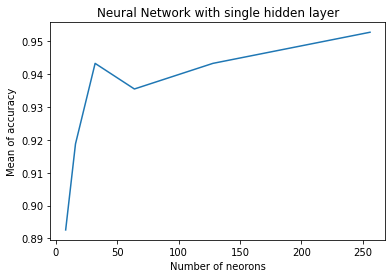

In [38]:
#use the plot to see how many neurons have the best performance
neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]
mean_accuracies = []
for n in neurons:
    accuracies = cross_validate(n, data, target)
    mean_accuracies.append(np.mean(accuracies))
x = [i[0] for i in neurons]
y = mean_accuracies
plt.plot(x, y)
plt.xlabel('Number of neorons')
plt.ylabel('Mean of accuracy')
plt.title('Neural Network with single hidden layer')

In [41]:
def cross_validate(n_neurons, df, target, nsplits = 4):
    kf = KFold(n_splits=nsplits, random_state=2)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        model = train_NN(n_neurons, train_features, train_target)
        train_accuracy = test(model, train_features, train_target)
        test_accuracy = test(model, test_features, test_target)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    return train_accuracies, test_accuracies
train_accuracies, test_accuracies = cross_validate((8,), data, target)
mean_train_accuracies = np.mean(train_accuracies)
mean_test_accuracies = np.mean(test_accuracies)
print("mean_train_accuracies = ", mean_train_accuracies)
print("mean_test_accuracies = ", mean_test_accuracies)

mean_train_accuracies =  0.9745870315174505
mean_test_accuracies =  0.892600841375897


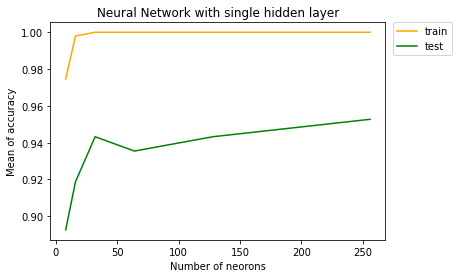

In [42]:
def run_draw_nn(neurons, plt_title, nsplits = 4):
    train_mean_accuracies = []
    test_mean_accuracies = []
    for n in neurons:
        train_accuracies, test_accuracies = cross_validate(n, data, target, nsplits)
        train_mean_accuracies.append(np.mean(train_accuracies))
        test_mean_accuracies.append(np.mean(test_accuracies))
    x = [i[0] for i in neurons]
    y = train_mean_accuracies
    plt.plot(x, y, color = 'orange', label = 'train')
    y = test_mean_accuracies
    plt.plot(x, y, color = 'green', label = 'test')
    plt.xlabel('Number of neorons')
    plt.ylabel('Mean of accuracy')
    plt.title(plt_title)
    plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
    return train_mean_accuracies, test_mean_accuracies
neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with single hidden layer')

#Neural Network with hidden layers

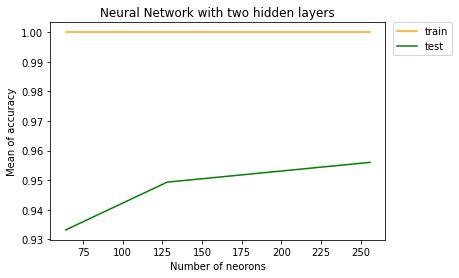

In [43]:
neurons = [(64,64),(128,128),(256,256)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with two hidden layers')

In [44]:
test_mean_accuracies

[0.9332182628062361, 0.9493504083147736, 0.9560368720613709]

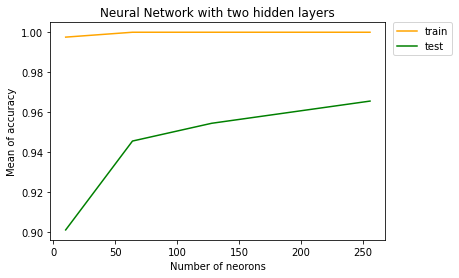

In [45]:
neurons = [(10,10,10),(64,64,64),(128,128,128),(256, 256, 256)]
train_mean_accuracies, test_mean_accuracies = run_draw_nn(neurons, 'Neural Network with two hidden layers', 6)

In [46]:
test_mean_accuracies

[0.9009364548494984, 0.945473801560758, 0.9543738387216649, 0.9654998141954664]